<a href="https://colab.research.google.com/github/datavzch/GANWS21_DEMO/blob/main/Simple_GAN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**


In [13]:
%matplotlib inline
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt


# **Define Discriminator and Generator**

In [14]:
def define_discriminator(n_inputs= 2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units= 50,
                                 activation= 'relu',
                                 input_dim= n_inputs,
                                 kernel_initializer= 'he_uniform'))
    model.add(keras.layers.Dense(units= 1,
                                 activation= 'sigmoid'))
    model.compile(loss= 'binary_crossentropy',
                  optimizer= 'adam',
                  metrics= ['accuracy'])
    
    return model

In [15]:
def define_generator(latent_dim, n_outputs= 2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units= 20,
                                 input_dim= latent_dim,
                                 activation= 'relu',
                                 kernel_initializer= 'he_uniform'))
    model.add(keras.layers.Dense(units= n_outputs,
                                 activation= 'linear'))
    
    return model

# **Define GAN**

In [16]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.models.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam')
    
    return model

# **Generate Sample**

In [17]:
# Input 
def generate_real_sample(n):
    X1 = np.random.rand(n) - 0.5 # Generates random numbers - Determines the direction of the output graph
    X2 = X1 * X1 # One Dimensional Function - Determines the Shape of the output
    X1 = X1.reshape((n, 1))
    X2 = X2.reshape((n, 1))
    X = np.hstack((X1, X2))
    y = np.ones((n, 1))
    return X, y

In [18]:
def generate_latent_points(latent_dim, n):
    x_input = np.random.rand(latent_dim * n)
    x_input = x_input.reshape((n, latent_dim))
    return x_input

In [19]:
def generate_fake_sample(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = np.zeros((n, 1))
    return X, y

# **Summarize Performance**

In [20]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n = 100):
    X_real, y_real = generate_real_sample(n)
    X_fake, y_fake = generate_fake_sample(generator= generator,
                                          latent_dim= latent_dim,
                                          n = n)
    _, acc_real = discriminator.evaluate(X_real, y_real, verbose= 0)
    _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose= 0)
    print(f'Epoch: {epoch + 1}, Acc_real: {acc_real}, Acc_fake: {acc_fake}')
    plt.scatter(X_real[:,0], X_real[:,1], color= 'red')
    plt.scatter(X_fake[:,0], X_fake[:,1], color= 'blue')
    file_name= f'Eval_Epoch{epoch + 1}.png'
    plt.savefig(file_name)
    plt.show()
    plt.close()

# **Model Training**

In [21]:
def train(g_model, d_model, GAN_model, latent_dim, n_batch= 256, epochs = 50000):
    half_batch = int(n_batch / 2)
    for i in range(epochs):
        X_real, y_real = generate_real_sample(half_batch)
        X_fake, y_fake = generate_fake_sample(generator= g_model,
                                              latent_dim= latent_dim,
                                              n= half_batch)
        d_model.train_on_batch(X_real, y_real)
        d_model.train_on_batch(X_fake, y_fake)
        
        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        GAN_model.train_on_batch(X_gan, y_gan)
        
        if (i+1)%5000 == 0:
            summarize_performance(epoch= i,
                                  generator= g_model,
                                  discriminator= d_model,
                                  latent_dim= latent_dim)

Epoch: 5000, Acc_real: 0.20999999344348907, Acc_fake: 1.0


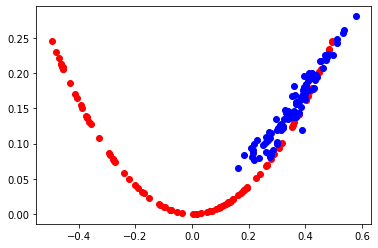

Epoch: 10000, Acc_real: 0.5799999833106995, Acc_fake: 0.5899999737739563


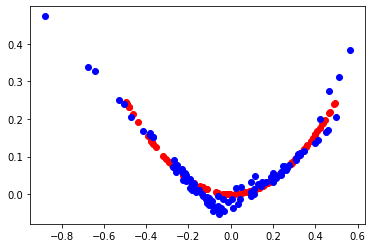

Epoch: 15000, Acc_real: 0.3499999940395355, Acc_fake: 0.6299999952316284


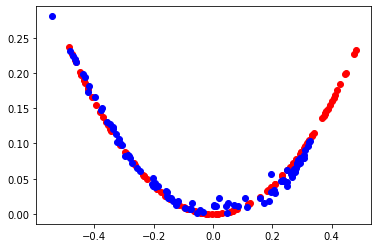

Epoch: 20000, Acc_real: 0.20999999344348907, Acc_fake: 0.9200000166893005


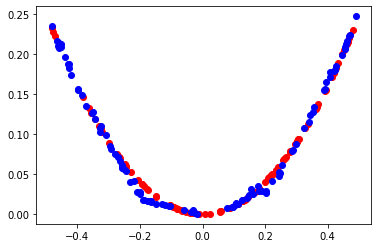

Epoch: 25000, Acc_real: 0.5199999809265137, Acc_fake: 0.5400000214576721


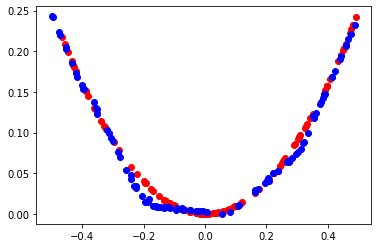

Epoch: 30000, Acc_real: 0.5299999713897705, Acc_fake: 0.5


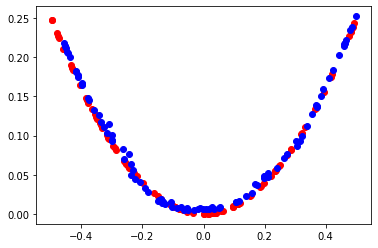

KeyboardInterrupt: ignored

In [22]:
latent_dim = 5
gen_model = define_generator(latent_dim= latent_dim)
dis_model = define_discriminator()
gan_model = define_gan(gen_model, dis_model)
train(g_model= gen_model, d_model= dis_model, GAN_model= gan_model, latent_dim= latent_dim)

# **Modify Input to change Output Graph**

In [23]:
# New Input 
def generate_real_sample(n):
    X1 = np.random.rand(n) - 0.5 # Generates random numbers - Determines the direction of the output graph
    X2 = X1 * X1 * X1 # One Dimensional Function - Determines the Shape of the output
    X1 = X1.reshape((n, 1))
    X2 = X2.reshape((n, 1))
    X = np.hstack((X1, X2))
    y = np.ones((n, 1))
    return X, y

Epoch: 5000, Acc_real: 0.6899999976158142, Acc_fake: 0.4300000071525574


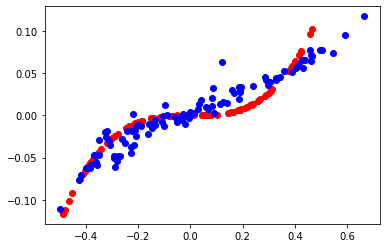

Epoch: 10000, Acc_real: 0.5400000214576721, Acc_fake: 0.47999998927116394


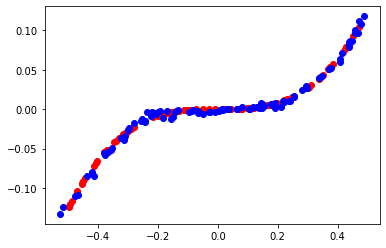

Epoch: 15000, Acc_real: 0.6000000238418579, Acc_fake: 0.5299999713897705


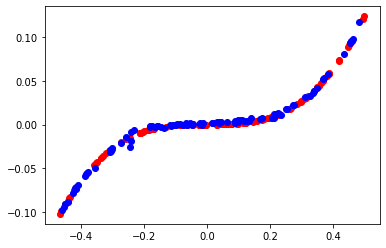

Epoch: 20000, Acc_real: 0.4399999976158142, Acc_fake: 0.5600000023841858


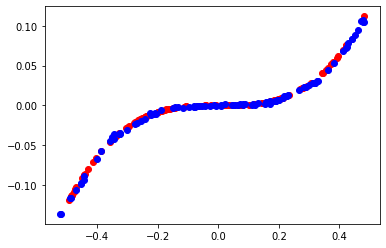

Epoch: 25000, Acc_real: 0.4000000059604645, Acc_fake: 0.6399999856948853


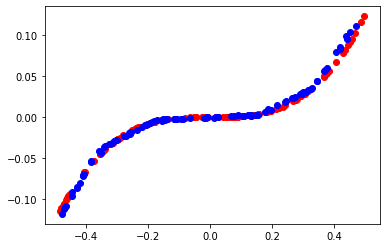

Epoch: 30000, Acc_real: 0.5600000023841858, Acc_fake: 0.5199999809265137


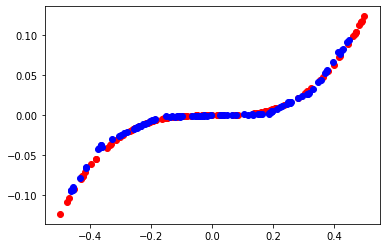

KeyboardInterrupt: ignored

In [25]:
#Generate new Output 
latent_dim = 5
gen_model = define_generator(latent_dim= latent_dim)
dis_model = define_discriminator()
gan_model = define_gan(gen_model, dis_model)
train(g_model= gen_model, d_model= dis_model, GAN_model= gan_model, latent_dim= latent_dim)